<a href="https://colab.research.google.com/github/cdavidrios/TDS1_Variable_aleatoria/blob/main/Variable_aleatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variable aleatoria
**Autores**
* Daniel Escobar Grisales
* Cristian David Rios Urrego
* Juan Rafael Orozco Arroyave

## Introducción
En este notebook exploraremos conceptos fundamentales de estadística que son esenciales para el análisis de señales con comportamiento incierto o variable, como ocurre en entornos reales con ruido, datos biomédicos o sistemas de comunicación.

A través de simulaciones y visualizaciones interactivas, abordaremos los siguientes temas:

* **Histogramas y distribuciones**: representaremos gráficamente la densidad de probabilidad empírica de muestras aleatorias.

* **Teorema del Límite Central (TLC)**: observaremos cómo la suma de variables aleatorias tiende a seguir una distribución normal, incluso cuando las variables originales no son normales.

* **Percentiles**: aprenderemos a interpretar y calcular percentiles como medidas estadísticas útiles para resumir datos.

* **Pruebas de hipótesis**: simularemos comparaciones entre grupos mediante pruebas estadisticas.


## Librerias necesarias

In [4]:
!pip install pingouin

*Librerias*

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, expon, pearsonr, shapiro, kstest, mannwhitneyu
import seaborn as sns
import numpy as np
from pingouin import ttest

## Histograma y distribuciones

Un histograma es una representación gráfica de la distribución de datos numéricos. Se utiliza principalmente para mostrar la frecuencia con la que ocurren ciertos valores dentro de un conjunto de datos. Es una herramienta útil para entender la forma y la dispersión de los datos, así como para identificar patrones o tendencias.

In [6]:
df_results = pd.read_csv('results_toy_samples.csv')
df_results.head()

,Class,Age,Weight,Score,Target,Target predict
0,PD,43.156008,55.619430,0.540454,1,1
1,HC,44.711019,79.708838,0.191423,0,0
2,HC,75.310288,62.886271,0.470267,0,0
3,HC,52.646040,66.527570,0.610779,0,1
4,PD,82.928449,65.743703,0.813744,1,1


<Axes: xlabel='Score', ylabel='Count'>

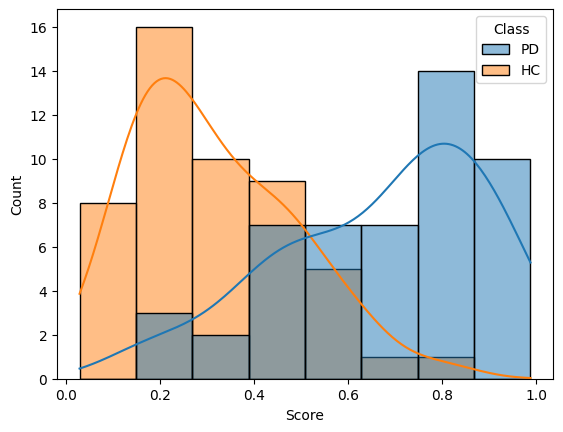

In [7]:
sns.histplot(data=df_results, x="Score", hue="Class", kde=True)

Para que este histograma se convierta en una PDF valida debe ser normalizado, de tal manera que cumpla con el axima de normalización.

<Axes: xlabel='Score', ylabel='Density'>

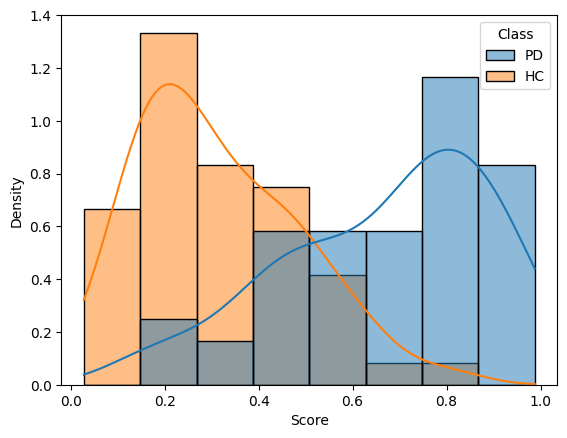

In [8]:
sns.histplot(data=df_results, x="Score", hue="Class", stat = 'density',kde=True)

### Variables alatorias uniformes discretas

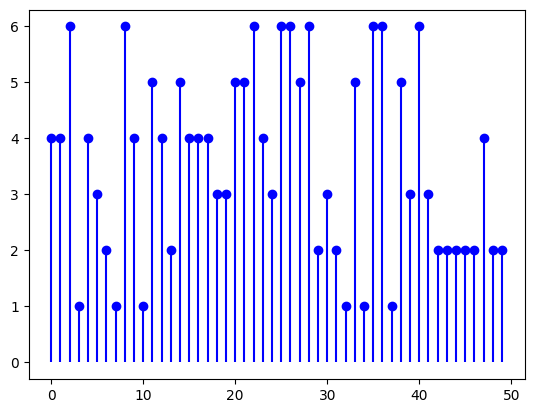

In [9]:
import numpy as np
import matplotlib.pyplot as plt
a = 1
b = 7
size = 50 # Aumentar la cantidad de repeticiones para una VA
experiment_dados = np.random.uniform(a, b, size)
experiment_dados_int = [int(sample) for sample in experiment_dados]
x = np.arange(0, size, 1)
plt.plot(x,experiment_dados_int,"bo")
plt.vlines(x,0,experiment_dados_int,"b")

### Histograma de una VA discreta

<BarContainer object of 6 artists>

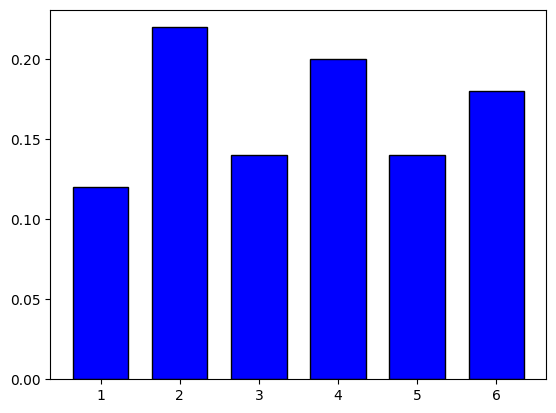

In [10]:
unique, counts = np.unique(experiment_dados_int, return_counts=True)
#plt.bar(unique, counts, color ='blue', width = 0.7, edgecolor='black')
plt.bar(unique, counts/len(experiment_dados_int), color ='blue', width = 0.7, edgecolor='black') #Density

### Variales aleatorios continuas

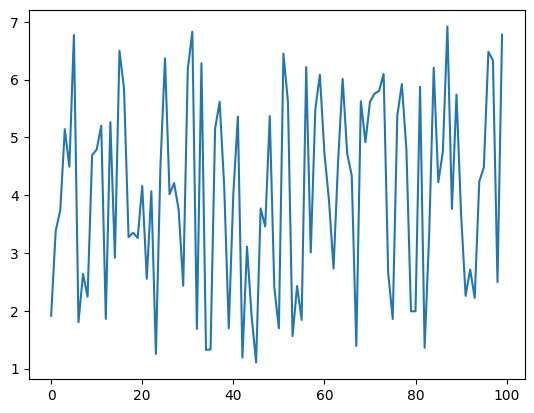

In [11]:
size = 100 # Aumentar la cantidad de repeticiones para una VA
experiment_dados = np.random.uniform(a, b, size)
plt.plot(experiment_dados)

### Histograma de una VA continua

<BarContainer object of 100 artists>

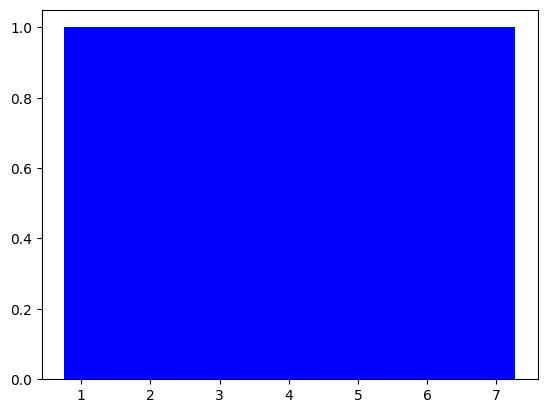

In [12]:
unique, counts = np.unique(experiment_dados, return_counts=True)
plt.bar(unique, counts, color ='blue', width = 0.7)
#experiment_dados

Todas las variables aparecen 1 vez, porque son valores continuos. La probabilidad de que se repitan es muy baja

¿ Que hago para realizar el histograma cuando las variables que uso son continuas?

Agrupar los datos en pequeños subconjuntos

### Bin

Los *bins* definen el numero de intervalos en los que se divide el rango total de valores de los datos. Cada *bin* representa un conjunto específico de valores o un intervalo de valores contiguos en los datos. La cantidad y el tamaño de los *bins* pueden variar dependiendo de cómo se desee visualizar la distribución de los datos.

Por ejemplo, si tienes un conjunto de datos que varían entre 0 y 100 y decides dividirlos en 10 bins iguales, cada bin abarcará un rango de 10 unidades (por ejemplo, 0-10, 10-20, 20-30, etc.). La altura de cada barra en el histograma representará la cantidad de datos que caen dentro de cada uno de estos intervalos.

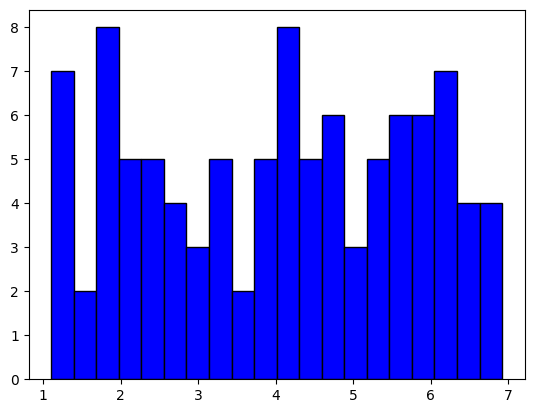

In [13]:
plt.hist(experiment_dados, color ='blue', bins = 20, edgecolor='black')
plt.show()

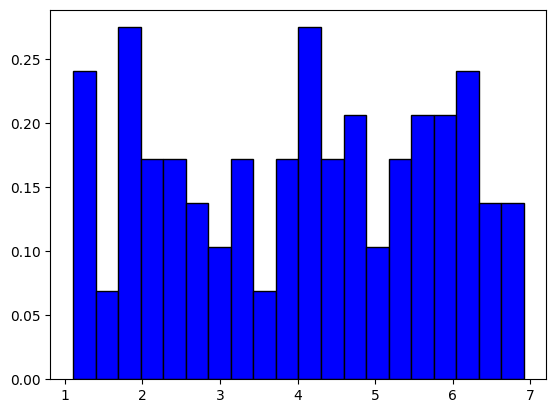

In [14]:
plt.hist(experiment_dados, color ='blue', bins = 20, density = True, edgecolor='black')
plt.show()

Ejemplo variando la cantidad de bins

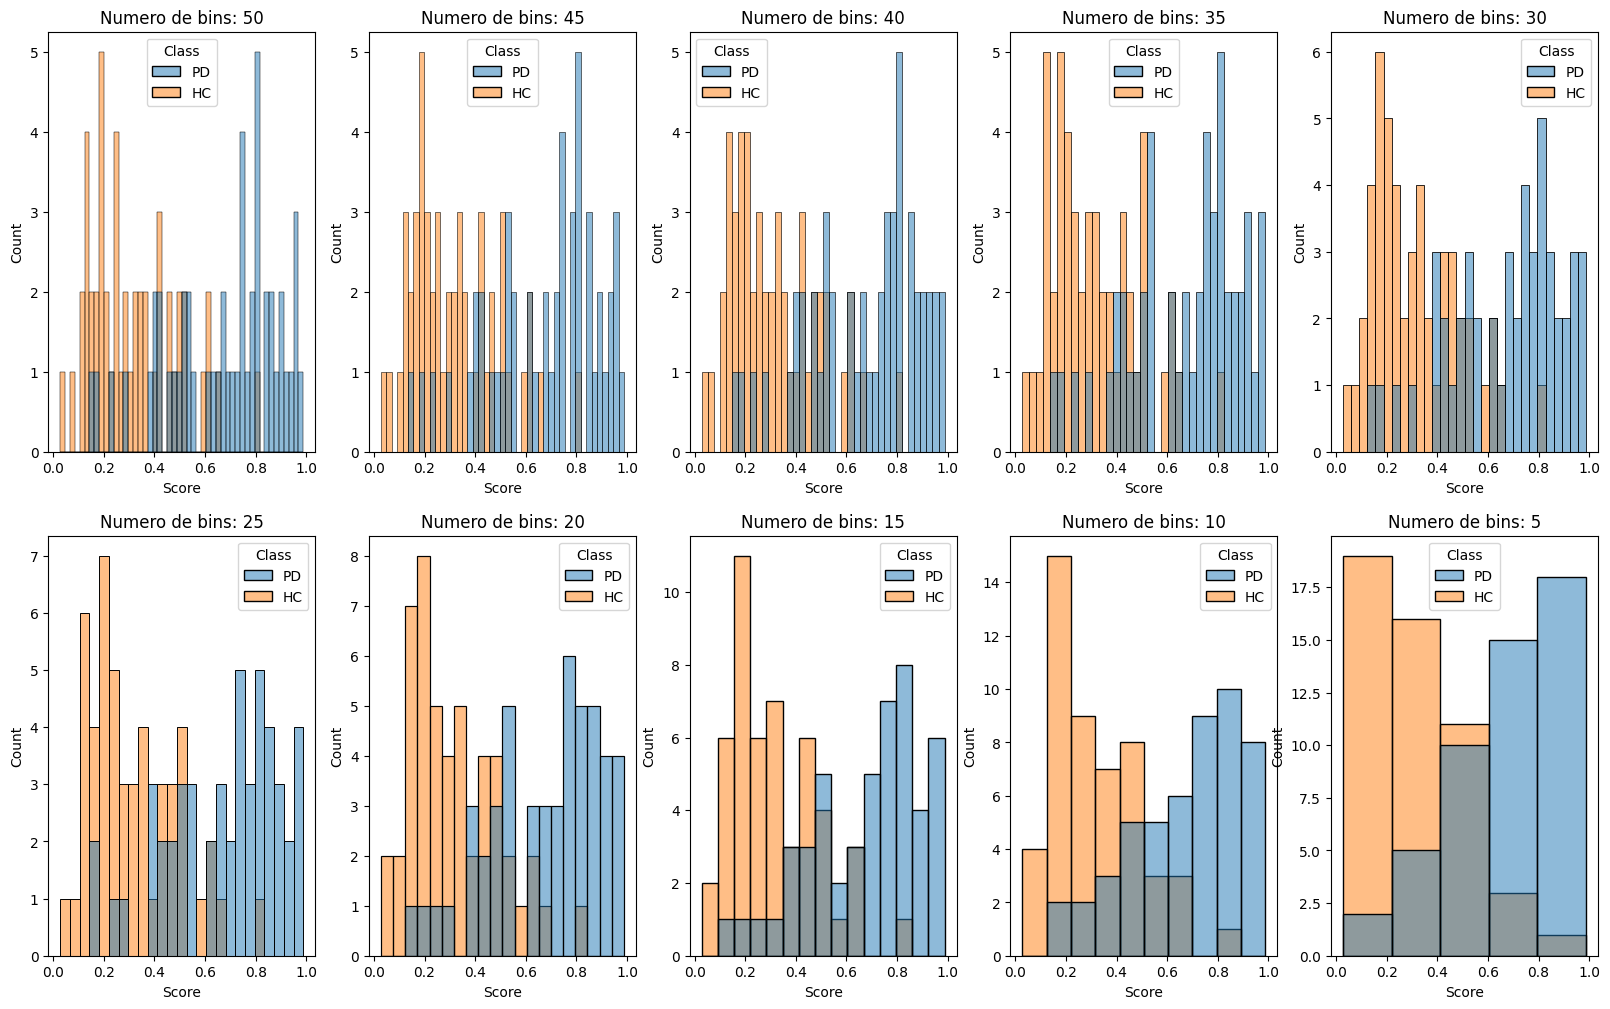

In [15]:
bins_array = list(np.arange(5, 55, 5))
plt.figure(figsize=(20,12))
for i, bin in enumerate(bins_array[::-1]):
  plt.subplot(2,5,i+1)
  plt.title('Numero de bins: '+ str(bin))
  sns.histplot(data=df_results, x="Score", hue="Class", bins = bin)

plt.show()

## Teorema del Límite Central (TLC)


El **Teorema del Límite Central (TLC)** establece que, bajo ciertas condiciones, la suma (o promedio) de un número suficientemente grande ($N$) de variables aleatorias independientes e idénticamente distribuidas (i.i.d.) tiende a seguir una **distribución normal** con media $\mu$ o $N\mu$, sin importar la distribución original de esas variables.

Sea $( X_1, X_2, \ldots, X_n)$ un conjunto de variables aleatorias i.i.d. con media $\mu$ y varianza $\sigma^2$. El TLC establece que:

**Muestra total**
$$\sum_{i=1}^n X_i \xrightarrow{} \mathcal{N} \left( N\mu, N\sigma^2 \right)$$
**Media muestral**
$$\frac{1}{N} \sum_{i=1}^n X_i \xrightarrow{} \mathcal{N} \left( \mu, \frac{\sigma^2}{N} \right)$$


* Aunque los $X_i$ no sean normales, la **distribución del promedio** tenderá a ser normal si $N$ es suficientemente grande.
- Esto permite aplicar métodos estadísticos basados en la normalidad incluso cuando los datos originales no son normales.


### Suma de VAs exponenciales


Valores teóricos para la media y std de la VA exponencial ($\lambda$)
Media:  0.2
Varianza:  0.2


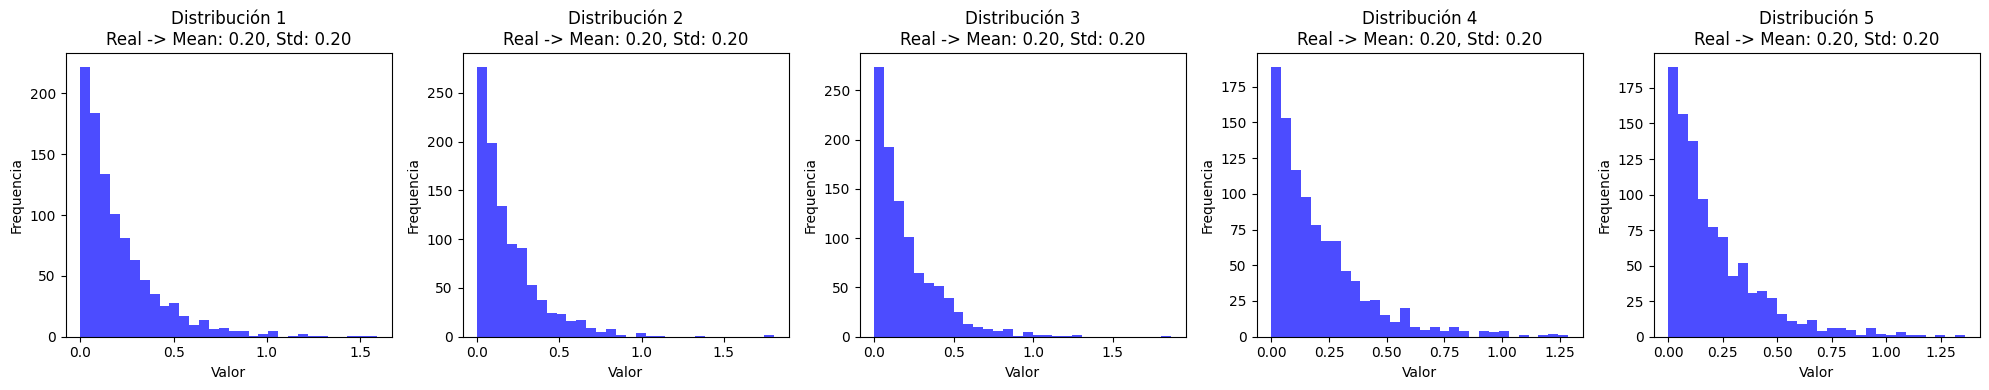

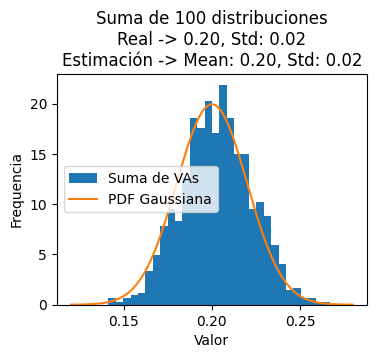

In [16]:
# Parametere
n_realizations = 1000  # Number of samples in each vector

## Parametros dist uniforme ##
lmda = 5

mean_u = 1/lmda # media teórica
std_u = 1/lmda # desv est teórica

print("Valores teóricos para la media y std de la VA exponencial ($\lambda$)")
print("Media: ", mean_u)
print("Varianza: ", std_u)


n_distributions = 100
dist_matrix = np.zeros((n_distributions, n_realizations))  # Initialize the dist_matrix to store the vectors
# Create a figure with subplots
fig, ax_dist = plt.subplots(1, 5, figsize=(20, 4))
for d in range(n_distributions):
  #### Generate samples from a normal distribution ####

  ## Distribución Exponencial ##
  # realizations = expon.rvs(loc=lmda, scale=1/lmda, size=n_realizations)
  realizations = expon.rvs(size=n_realizations, scale=1/lmda)

  dist_matrix[d, :] = realizations

  # Plot the histogram of the realizations
  if(d < 5):
    ax_dist[d].hist(realizations, bins=30, color='blue', alpha=0.7)
    ax_dist[d].set_title(f'Distribución {d+1}\nReal -> Mean: {mean_u:.2f}, Std: {std_u:.2f}')
    ax_dist[d].set_xlabel('Valor')
    ax_dist[d].set_ylabel('Frequencia')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### Calcular la suma ####
sum_result = np.sum(dist_matrix, axis=0)/d # suma promedio de VAs dividida por el número de VAs, i.e., distribución muestral
# sum_result = np.mean(dist_matrix, axis=0)
#### Calcular la media ####
# samples_col = np.mean(matrix, axis=0)

# Calculate the mean and standard deviation of the sum of VAs

mean_sum = np.mean(sum_result) # Medica teórica
std_sum = np.std(sum_result)  # Desviación estándar teórica

mean_s = mean_u # la media teórica es igual a la media de la distribución muestral (diapositiva 16)
std_s = std_u/(np.sqrt(n_distributions)) # diapositiva 16

# Generate a range of x values (support of the distribution)
x_values = np.linspace(mean_s - 4*std_s, mean_s + 4*std_s, n_realizations)
pdf_values = norm.pdf(x_values, loc=mean_s, scale=std_s)

# Calculate the PDF for each x value using the Gaussian formula
# normal = norm(loc=mean_s, scale=std_s)
# x_values = np.linspace(normal.ppf(0.001),normal.ppf(0.999), n_realizations)
# pdf_values = normal.pdf(x_values)


plt.figure(figsize=(4,3))
plt.hist(sum_result, bins=30, density=True, stacked=True, label="Suma de VAs")
plt.plot(x_values, pdf_values, label=f'PDF Gaussiana')
plt.title(f'Suma de {n_distributions} distribuciones\nReal -> {mean_s:.2f}, Std: {std_s:.2f}\nEstimación -> Mean: {mean_sum:.2f}, Std: {std_sum:.2f}')
plt.xlabel('Valor')
plt.ylabel('Frequencia')
plt.legend()
plt.show()



## Percentiles

Los **percentiles** son medidas estadísticas que dividen un conjunto de datos ordenado en 100 partes iguales. Cada percentil indica el valor por debajo del cual se encuentra un cierto porcentaje de los datos.

Por ejemplo:
- El **percentil 25 (P25)** indica que el 25% de los datos son menores o iguales a ese valor.
- El **percentil 50 (P50)** es equivalente a la **mediana**, dividiendo el conjunto en dos mitades.
- El **percentil 75 (P75)** señala que el 75% de los datos están por debajo de ese valor.

**Para que sirven**
- Permiten describir la **dispersión** y **asimetría** de los datos.
- Se utilizan en gráficos como el **diagrama de caja (boxplot)**.
- Son útiles para detectar **valores atípicos** (outliers) o comparaciones entre distribuciones.



### Comparación de Percentiles: HC vs PD

En esta sección compararemos la distribución de una medida cuantitativa entre dos grupos de sujetos:

- **HC (Healthy Controls)**: sujetos sin diagnóstico de enfermedad.
- **PD (Parkinson’s Disease)**: pacientes diagnosticados con enfermedad de Parkinson.

La medida es un score que busca cuantificar el deterioro motor sufrido por los sujetos

Para entender las diferencias entre ambos grupos, analizaremos sus **percentiles** (P25, P50, P75), lo que nos permitirá observar posibles desplazamientos en la mediana, cambios en la dispersión y detectar asimetrías.

Este tipo de análisis es útil cuando:
- Las distribuciones no son normales.
- Queremos evitar depender solo de medidas como la media y la desviación estándar.
- Buscamos comparar rangos y detectar solapamientos entre grupos.



(-0.2, 1.2)

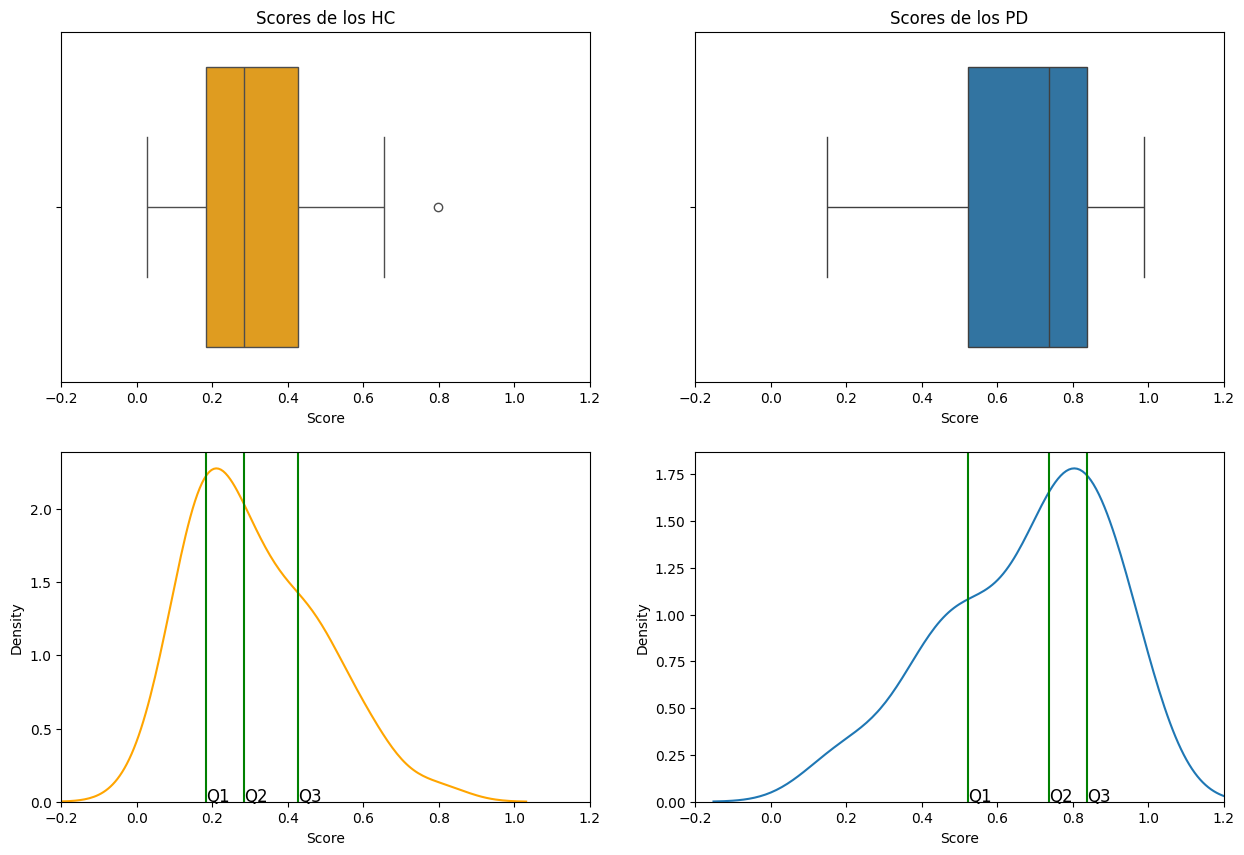

In [17]:
# Tomando solo los scores de la clase PD
df_results_PD = df_results[df_results['Class'] == 'PD']
# Tomando solo los scores de la clase HC
df_results_HC = df_results[df_results['Class'] == 'HC']

fig, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(df_results_PD, x="Score", ax = ax[0,1])
sns.kdeplot(df_results_PD, x="Score", ax = ax[1,1])



sns.boxplot(df_results_HC, x="Score", ax = ax[0,0], color = 'orange')
sns.kdeplot(df_results_HC, x="Score", ax = ax[1,0], color = 'orange')


for i,quartile in enumerate(range(25, 100, 25)):
  quartile_val_hc = np.percentile(df_results_HC['Score'], quartile)
  quartile_val_pd = np.percentile(df_results_PD['Score'], quartile)
  ax[1,0].axvline(quartile_val_hc, color = 'g')
  ax[1,0].text(quartile_val_hc, 0, 'Q' + str(i+1), fontsize=12)


  ax[1,1].axvline(quartile_val_pd, color = 'g')
  ax[1,1].text(quartile_val_pd, 0, 'Q' + str(i+1), fontsize=12)

ax[0,0].set_title('Scores de los HC')
ax[0,1].set_title('Scores de los PD')
ax[0,0].set_xlim(-0.2, 1.2)
ax[0,1].set_xlim(-0.2, 1.2)
ax[1,0].set_xlim(-0.2, 1.2)
ax[1,1].set_xlim(-0.2, 1.2)



(-0.2, 1.2)

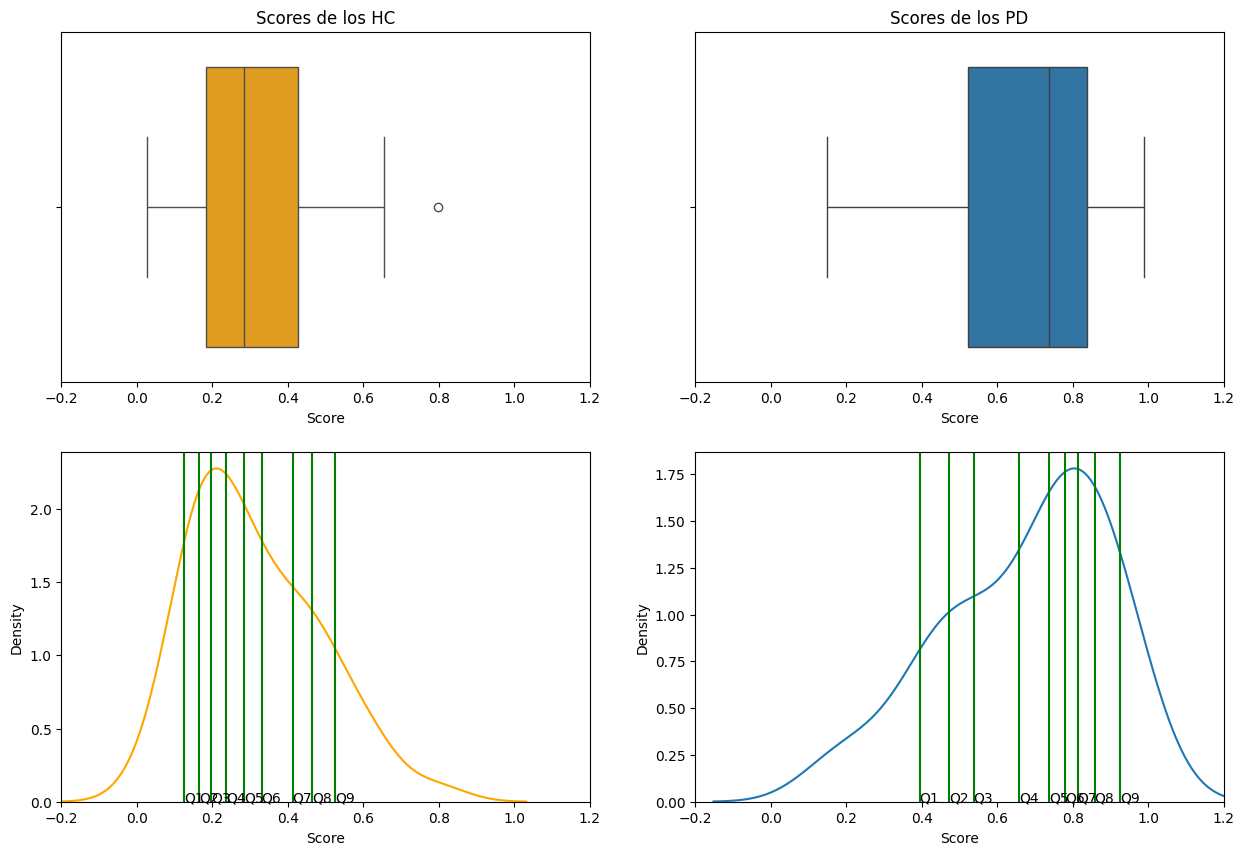

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(df_results_PD, x="Score", ax = ax[0,1])
sns.kdeplot(df_results_PD, x="Score", ax = ax[1,1])

sns.boxplot(df_results_HC, x="Score", ax = ax[0,0], color = 'orange')
sns.kdeplot(df_results_HC, x="Score", ax = ax[1,0], color = 'orange')

for i,decile in enumerate(range(10, 100, 10)):
  decile_val_hc = np.percentile(df_results_HC['Score'], decile)
  decile_val_pd = np.percentile(df_results_PD['Score'], decile)
  ax[1,0].axvline(decile_val_hc, color = 'g')
  ax[1,0].text(decile_val_hc, 0, 'Q' + str(i+1), fontsize=10)

  ax[1,1].axvline(decile_val_pd, color = 'g')
  ax[1,1].text(decile_val_pd, 0, 'Q' + str(i+1), fontsize=10)

ax[0,0].set_title('Scores de los HC')
ax[0,1].set_title('Scores de los PD')
ax[0,0].set_xlim(-0.2, 1.2)
ax[0,1].set_xlim(-0.2, 1.2)
ax[1,0].set_xlim(-0.2, 1.2)
ax[1,1].set_xlim(-0.2, 1.2)

In [19]:
per_array = np.arange(5, 100, 5)
percentile_df = pd.DataFrame()
percentile_df['Percentile'] = ['Percentile '+ str(value) for value in per_array]
percentile_df['PD value'] = [np.percentile(df_results_PD['Score'], val) for val in per_array]
percentile_df['HC value'] = [np.percentile(df_results_HC['Score'], val) for val in per_array]
percentile_df

,Percentile,PD value,HC value
0,Percentile 5,0.257376,0.113033
1,Percentile 10,0.394182,0.126154
2,Percentile 15,0.413443,0.144556
3,Percentile 20,0.473090,0.166005
4,Percentile 25,0.521536,0.183382
5,Percentile 30,0.536909,0.196085
6,Percentile 35,0.617203,0.208229
7,Percentile 40,0.658609,0.237643
8,Percentile 45,0.698746,0.249642
9,Percentile 50,0.737225,0.284339


## Pruebas Estadísticas

Las **pruebas estadísticas** permiten tomar decisiones sobre conjuntos de datos cuando existe incertidumbre. En particular, nos ayudan a determinar si las diferencias observadas entre dos o más grupos son **estadísticamente significativas** o si podrían haber ocurrido por azar.

Antes de elegir una prueba, es importante distinguir entre dos tipos:

**Pruebas Paramétricas**
- Suponen que los datos siguen una **distribución específica**, generalmente la **distribución normal**.
- Requieren que los grupos tengan varianzas similares.
- Son más potentes cuando se cumplen sus supuestos.

***Ejemplo típico***: Prueba t de Student para comparar medias entre dos grupos.

**Pruebas No Paramétricas**
- **No asumen una distribución específica** de los datos.
- Se utilizan cuando los datos no son normales, hay presencia de valores atípicos o el tamaño muestral es pequeño.
- Evalúan diferencias en las **medianas** o en el orden de los datos.

***Ejemplo típico***: Prueba de Mann–Whitney U (también conocida como Wilcoxon Rank-Sum).


### Comparación de Variables Demográficas

Además de las características analizadas previamente, los sujetos también presentan variables demográficas relevantes como **edad** y **peso**. En esta sección, evaluaremos si existen **diferencias estadísticamente significativas** entre los grupos (HC vs PD) en estas variables, utilizando pruebas estadísticas adecuadas.


#### Prueba de normalidad

Existen diferentes test estadisticos que permiten determinar si un conjunto de datos sigue una distribución normal. Dentro de los más usados se encuentran **Shapiro-Wilk test** o la prueba de **Kolmorokov-Smirnov**.

**Interpretación:**

$H_0:$ La población sigue una distribución normal

$H_1:$ La población no sigue una distribución normal

**Nota:** Si el p-value es menor a $\alpha$ se rechaza la hipotesis nula $H_0$ y se acepta la hipotesis alternativa $H_1$. Si el p-value es mayor a $\alpha$ la hiposesis nula $H_0$ no puede ser rechazada.

*Edad*

<Axes: xlabel='Weight', ylabel='Density'>

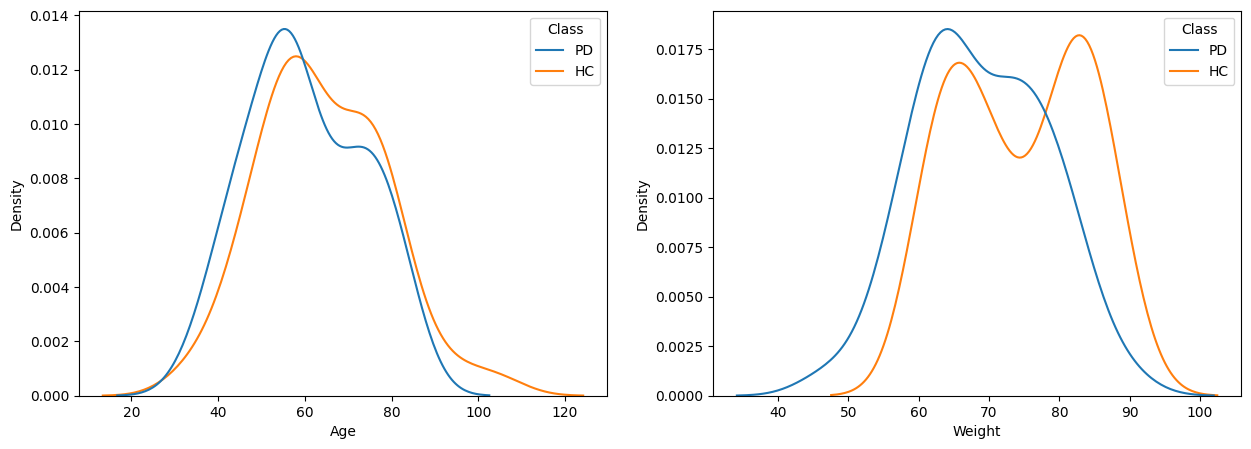

In [20]:
# Tomando solo los scores de la clase PD
df_results_PD = df_results[df_results['Class'] == 'PD']
# Tomando solo los scores de la clase HC
df_results_HC = df_results[df_results['Class'] == 'HC']

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.kdeplot(df_results, x="Age", hue = "Class", ax = ax[0])
sns.kdeplot(df_results, x="Weight", hue = "Class", ax = ax[1])


In [21]:
statistical_result_PD = shapiro(df_results_PD['Age'])
statistical_result_HC = shapiro(df_results_HC['Age'])

statistical_result_HC_Kol = kstest(df_results_HC['Age'], 'norm')
statistical_result_PD_Kol = kstest(df_results_PD['Age'], 'norm')

print('Con prueba Shapiro-Wilk, el p-value de la edad de los pacientes es:', statistical_result_PD.pvalue)
print('Con prueba Shapiro-Wilk, el p-value de la edad de los controles es:', statistical_result_HC.pvalue)

print('Con prueba Kolmogorov-Smirnov, el p-value de la edad de los pacientes es:', statistical_result_PD_Kol.pvalue)
print('Con prueba Kolmogorov-Smirnov, el p-value de la edad de los controles es:', statistical_result_HC_Kol.pvalue)

PD_HC = pd.concat([df_results_PD['Age'], df_results_HC['Age']])

statistical_result_HC_PD = shapiro(PD_HC)
statistical_result_HC_PD_Kol = kstest(PD_HC, 'norm')

print('Con prueba Shapiro-Wilk, el p-value de la edad de todo el corpus es:', statistical_result_HC_PD.pvalue)

print('Con prueba Kolmogorov-Smirnov, el p-value de la edad de todo el corpus es:', statistical_result_HC_PD_Kol.pvalue)


Con prueba Shapiro-Wilk, el p-value de la edad de los pacientes es: 0.1390990659300485
Con prueba Shapiro-Wilk, el p-value de la edad de los controles es: 0.6852008545785115
Con prueba Kolmogorov-Smirnov, el p-value de la edad de los pacientes es: 0.0
Con prueba Kolmogorov-Smirnov, el p-value de la edad de los controles es: 0.0
Con prueba Shapiro-Wilk, el p-value de la edad de todo el corpus es: 0.16465036769430264
Con prueba Kolmogorov-Smirnov, el p-value de la edad de todo el corpus es: 0.0


Prueba Kolmogorov-Smirnov para datos con distribución normal: 0.03212292472000311


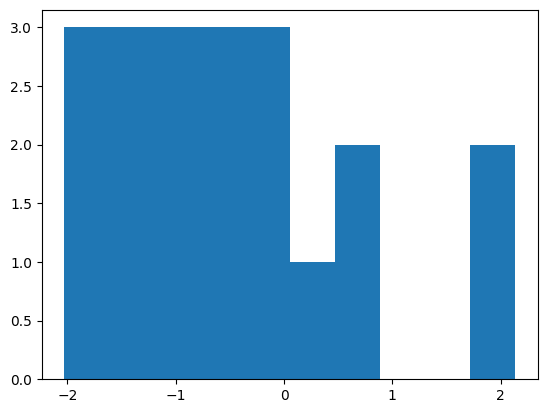

In [22]:
normal=np.random.normal(0,1.1,20)
plt.hist(normal)
statistical_result_normal = kstest(normal, 'norm')
print('Prueba Kolmogorov-Smirnov para datos con distribución normal:', statistical_result_normal.pvalue)

*Peso*

In [23]:
statistical_result_PD = shapiro(df_results_PD['Weight'])
statistical_result_HC = shapiro(df_results_HC['Weight'])

statistical_result_HC_Kol = kstest(df_results_HC['Weight'], 'norm')
statistical_result_PD_Kol = kstest(df_results_PD['Weight'], 'norm')

print('Con prueba Shpairo, el p-value del peso de los pacientes es:', statistical_result_PD.pvalue)
print('Con prueba Shapiro, el p-value del peso de los controles es:', statistical_result_HC.pvalue)

print('Con prueba Kolmogorov-Smirnov, el p-value del peso de los pacientes es:', statistical_result_PD_Kol.pvalue)
print('Con prueba Kolmogorov-Smirnov, el p-value del peso de los controles es:', statistical_result_HC_Kol.pvalue)

Con prueba Shpairo, el p-value del peso de los pacientes es: 0.8055361705628452
Con prueba Shapiro, el p-value del peso de los controles es: 0.0016479864862023906
Con prueba Kolmogorov-Smirnov, el p-value del peso de los pacientes es: 0.0
Con prueba Kolmogorov-Smirnov, el p-value del peso de los controles es: 0.0


T-test o T de student:  

In [24]:
ttest(df_results_PD['Age'], df_results_HC['Age'],  paired=True).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.67,49,two-sided,0.1,"[-8.82, 0.82]",0.29,0.558,0.52


In [25]:
mannwhitneyu(df_results_PD['Weight'], df_results_HC['Weight'])

MannwhitneyuResult(statistic=np.float64(839.0), pvalue=np.float64(0.0046560654649647065))

Al analizar las variables demográficas, se aplicaron pruebas estadísticas para comparar los grupos HC y PD. En el caso de la **edad**, la prueba t de Student arrojó un valor-p de 0.10, lo cual no permite rechazar la hipótesis nula con un nivel de significancia de $\alpha = 0.05$; por lo tanto, **no se encontró una diferencia estadísticamente significativa en la edad entre ambos grupos**.

Por otro lado, para la **variable peso**, se utilizó la prueba no paramétrica de **Mann–Whitney U**, obteniendo un valor-p de 0.0046. Este resultado indica una **diferencia estadísticamente significativa en el peso entre los grupos**, sugiriendo que la distribución del peso difiere entre sujetos con Parkinson y los controles sanos.